Summarizing the algorithm for K Means clustering based on this video:
1.	Start with k centroids by putting them at random points here k =2

2.	Compute distance of every point from centroid and cluster them accordingly

3.	Adjust centroid so they become center of gravity of given cluster 

4.	Again recluster every point based on distance with adjusted centroid

5.	Reiterate until data points stop changing cluster

6.	Again adjust centroids


Machine learning catagories into three catagory-> supervised, unsupervised and reinforsed learning.

Start with select two random points called centroids means two centroids.
next calculate distance from the centroids to other points.

Find center of gravity of those two cluster!!
then repeat the same method as above!
keep on repeat this process until they change their position.

Import sklearn, pandas and matplotlib

In [23]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

now print the csv file 

In [3]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Plot it on scatter plot!

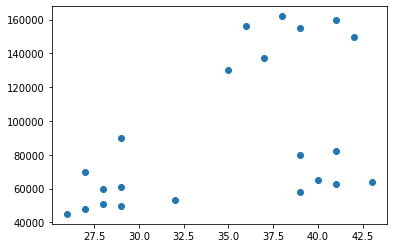

In [5]:
plt.scatter(df['Age'],df['Income($)'])

Create km objectframe and will make 3 cluster

In [6]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

Now Fit and predict.
exclude the name column cause here no need for string
Run kMeans algorithm

In [8]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

Append Cluster column.

In [9]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


Create 3 dataframe for 3 cluster.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


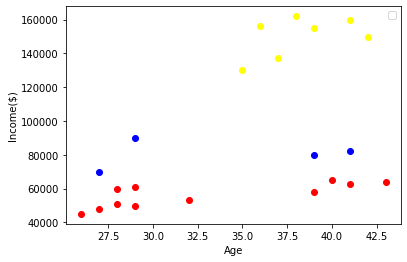

In [15]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'], color='red')
plt.scatter(df2.Age,df2['Income($)'], color='yellow')
plt.scatter(df3.Age,df3['Income($)'], color='blue')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In income column compare to Age their is too much scale. So, need to preprocessing. Scale according to 0 to 1 in both x and y axis.

In [26]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Drad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


Use KMeans algo on our scaled dataset.

In [28]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [31]:
df['cluster'] = y_predicted
df.drop('cluster',axis='columns')
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Drad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


Now, Plot this scaled datasets

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


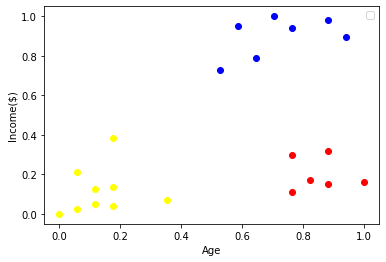

In [37]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'], color='red')
plt.scatter(df2.Age,df2['Income($)'], color='yellow')
plt.scatter(df3.Age,df3['Income($)'], color='blue')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

Our centroids that we have talked about.

In [33]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

Elbow plot method,


In [43]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [45]:
#sse -> Sum of squared error
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.34910470944195643,
 0.2766936276300278,
 0.21055478995472487,
 0.17840674931327927,
 0.13265419827245162,
 0.10188787724979424]

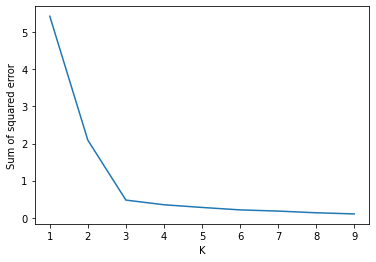

In [46]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)